In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

raw_data = pd.read_csv('RA_21_22.csv')          # Reading the data from csv file

raw_data.shape

(47776, 11)

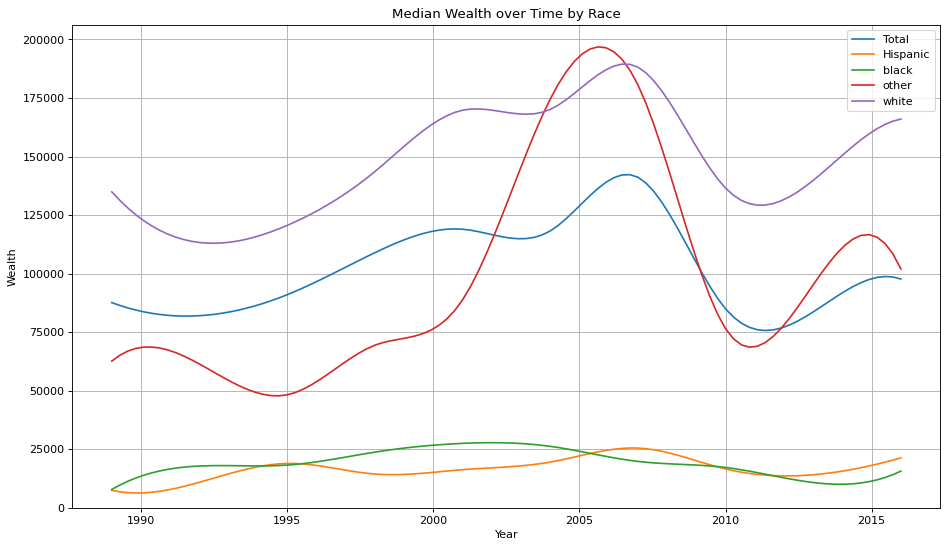

In [28]:
raw_data['wealth'] = raw_data['asset_total'] - raw_data['debt_total']             #Adding a cloumn for wealth in the data
raw_data['wealth_housing'] = raw_data['asset_housing'] - raw_data['debt_housing'] #Adding a cloumn for housing wealth
raw_data['wealth_non_housing'] = raw_data['wealth'] - raw_data['wealth_housing']  #Adding a cloumn for non-housing wealth

# Writing our custom function to calculate weighted median
def weighted_median(dataframe, value, weight):
    dataframe_sorted = dataframe.sort_values(value)
    cumsum = dataframe_sorted[weight].cumsum()
    cutoff = dataframe_sorted[weight].sum() / 2.
    return dataframe_sorted[cumsum >= cutoff][value].iloc[0]

# Function to group a dataframe by year and then plot the weighted medians for a variable value
def group_by_year_and_plot(dataframe, value, weight, label):
    dictionary = {}
    grouped_by_year = dataframe.groupby('year')
            
    for year, year_group in grouped_by_year:
        dictionary[year] = weighted_median(year_group, value, weight)
                
    # Smoothen the graph as we have limited points for years on x-axis
    x = np.array(list(dictionary.keys()))
    y = np.array(list(dictionary.values()))
    x_smooth = np.linspace(x.min(), x.max(), 100)
    spline = make_interp_spline(list(dictionary.keys()), list(dictionary.values()), k = 3) # Fitting to cubic spline
    y_smooth = spline(x_smooth)
    
    # Plot
    plt.plot(x_smooth, y_smooth, label = label)

# Function to plot a trend for a "value" when given grouping and/or filtering information
def plot_trend(dataframe, value, weight, groupby = None, filtration = None, label = None):
    filtered_dataframe = dataframe
    
    if filtration is not None:
        filtered_dataframe = dataframe.loc[dataframe[filtration['column']] == filtration['value']]
    
    if groupby is None:
        group_by_year_and_plot(filtered_dataframe, value, weight, label)
    
    else:
        grouped_dataframe = filtered_dataframe.groupby(groupby)
        
        for group_name, group in grouped_dataframe:
            group_by_year_and_plot(group, value, weight, label = group_name)
        

# Median Wealth over Time by Race

plt.figure(figsize = (14, 8), dpi = 80)
plot_trend(raw_data, "wealth", "weight", label = 'Total')
plot_trend(raw_data, "wealth", "weight", groupby = 'race')

plt.ylim(ymin = 0)
plt.grid(True)
plt.title('Median Wealth over Time by Race')
plt.xlabel('Year')
plt.ylabel('Wealth')
plt.legend()
plt.savefig("graph1.pdf", format="pdf")

plt.show()

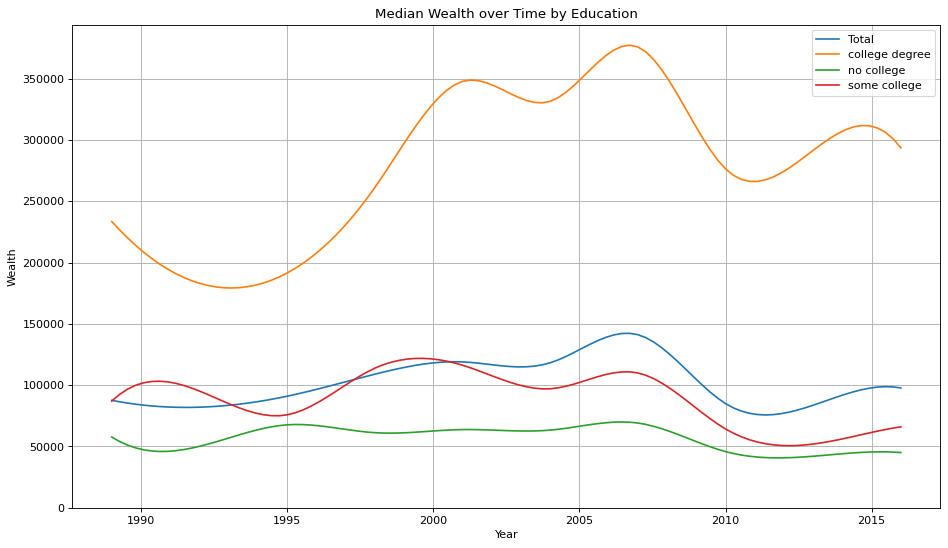

In [29]:
# Median Wealth over Time by Education

plt.figure(figsize = (14, 8), dpi = 80)
plot_trend(raw_data, "wealth", "weight", label = 'Total')
plot_trend(raw_data, "wealth", "weight", groupby = 'education')

plt.ylim(ymin = 0)
plt.grid(True)
plt.title('Median Wealth over Time by Education')
plt.xlabel('Year')
plt.ylabel('Wealth')
plt.legend()
plt.savefig("graph2.pdf", format="pdf")

plt.show()

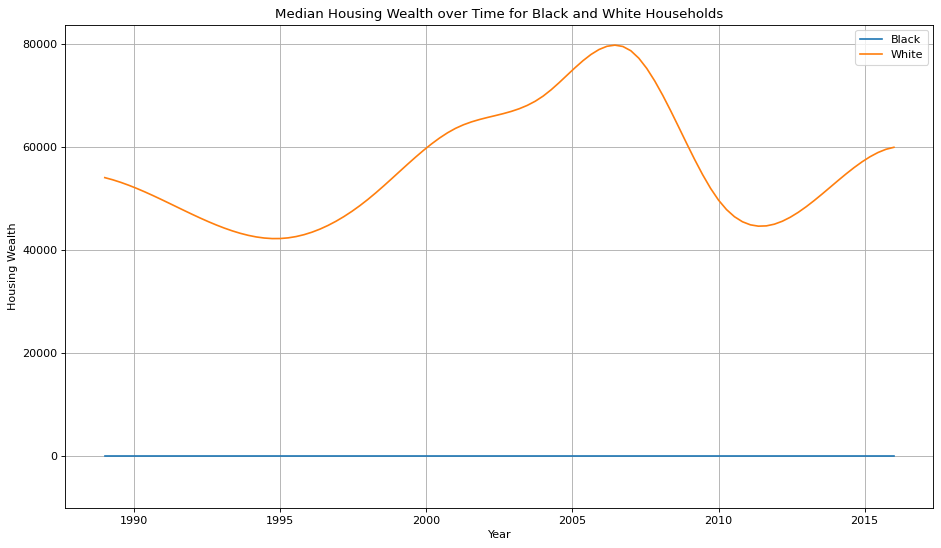

In [30]:
# Median Housing Wealth over Time for Black and White Households

plt.figure(figsize = (14, 8), dpi = 80)
plot_trend(raw_data, "wealth_housing", "weight", label = 'Black', filtration = {'column':'race', 'value':'black'})
plot_trend(raw_data, "wealth_housing", "weight", label = 'White', filtration = {'column':'race', 'value':'white'})

plt.ylim(ymin = -10000)
plt.grid(True)
plt.title('Median Housing Wealth over Time for Black and White Households')
plt.xlabel('Year')
plt.ylabel('Housing Wealth')
plt.legend()
plt.savefig("graph3.pdf", format="pdf")

plt.show()

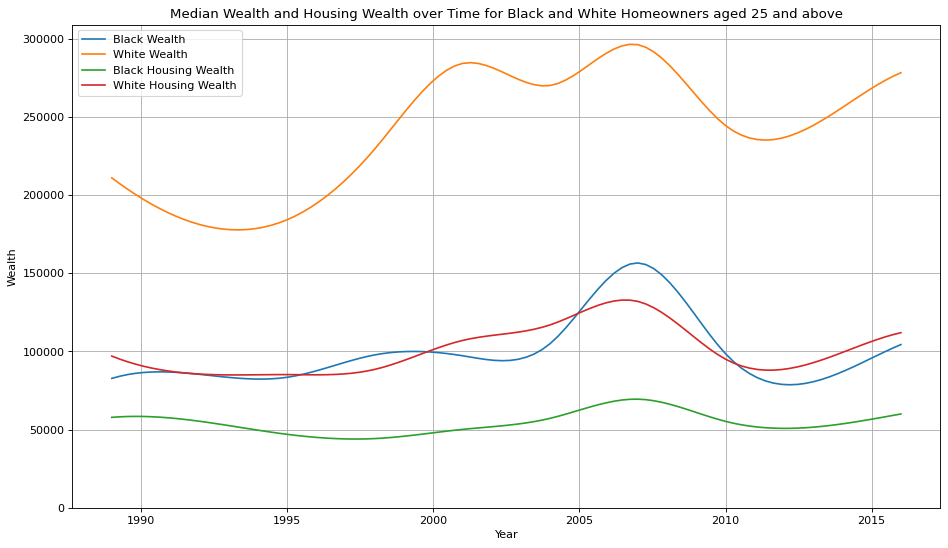

In [31]:
# Median Wealth and Housing Wealth over Time for Black and White Homeowners aged 25 and above

aged_data = raw_data.loc[raw_data['age'] >= 25]               # Filtering for age 25 and above
aged_homeowners_data = aged_data.loc[aged_data['asset_housing'] > 0]  # Filtering for homeowners

plt.figure(figsize = (14, 8), dpi = 80)
plot_trend(aged_homeowners_data, "wealth", "weight", label = 'Black Wealth', filtration = {'column':'race', 'value':'black'})
plot_trend(aged_homeowners_data, "wealth", "weight", label = 'White Wealth', filtration = {'column':'race', 'value':'white'})

plot_trend(aged_homeowners_data, "wealth_housing", "weight", label = 'Black Housing Wealth', \
           filtration = {'column':'race', 'value':'black'})
plot_trend(aged_homeowners_data, "wealth_housing", "weight", label = 'White Housing Wealth', \
           filtration = {'column':'race', 'value':'white'})

plt.ylim(ymin = 0)
plt.grid(True)
plt.title('Median Wealth and Housing Wealth over Time for Black and White Homeowners aged 25 and above')
plt.xlabel('Year')
plt.ylabel('Wealth')
plt.legend()
plt.savefig("graph4.pdf", format="pdf")

plt.show()